In [1]:
import pandas as pd
import spacy

nlp = spacy.load("pl_core_news_md")

In [2]:
df_train = pd.read_csv("klej_polemo2.0-in/train.tsv", sep="\t")
df_test = pd.read_csv("klej_polemo2.0-in/dev.tsv", sep="\t")

train_corpus = df_train["sentence"].tolist()
train_labels = df_train["target"].tolist()
test_corpus = df_test["sentence"].tolist()
test_labels = df_test["target"].tolist()

In [3]:
mapping = {"__label__meta_minus_m": 0, 
           "__label__meta_zero": 1, 
           "__label__meta_amb": 1, 
           "__label__meta_plus_m": 2}
train_labels = [mapping[label] for label in train_labels]
test_labels = [mapping[label] for label in test_labels]

In [4]:
doc_train_corpus = list(nlp.pipe(train_corpus, disable=["ner"]))
doc_test_corpus = list(nlp.pipe(test_corpus, disable=["ner"]))

norm_train_corpus = [[token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop] 
                     for doc in doc_train_corpus]
norm_test_corpus = [[token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop] 
                    for doc in doc_test_corpus]

# Klasyfikacja

## Naive Bayes

### Twierdzenie Bayesa

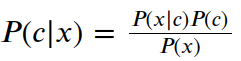

|x|c|
|-|-|
|1|1|
|1|1|
|0|1|
|1|0|
|1|0|
|1|1|
|0|0|
|1|1|

P(x) = 0.75; &nbsp; P(c) = 0.625; &nbsp; P(x|c) = 0.8; &nbsp; P(c|x) = (P(x|c)P(c))/P(x) = (0.8 * 0.625)/0.75 ≈ 0.67

### Naiwność

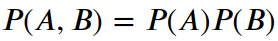

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
vect = CountVectorizer(preprocessor=lambda x: x, tokenizer=lambda x: x,
                       max_df=0.95, min_df=0.01)

In [7]:
X_train = vect.fit_transform(norm_train_corpus)

In [8]:
X_train.shape

(5744, 1093)

In [9]:
X_test = vect.transform(norm_test_corpus)

In [10]:
X_test.shape

(723, 1093)

In [11]:
from sklearn.naive_bayes import MultinomialNB

In [12]:
bayes = MultinomialNB()

In [13]:
bayes.fit(X_train, train_labels)

MultinomialNB()

In [14]:
train_predictions = bayes.predict(X_train)

In [15]:
test_predictions = bayes.predict(X_test)

In [16]:
train_predictions

array([2, 0, 2, ..., 2, 1, 2])

In [17]:
train_predictions.shape

(5744,)

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [19]:
accuracy_score(train_labels, train_predictions)

0.7947423398328691

In [20]:
accuracy_score(test_labels, test_predictions)

0.7621023513139695

In [21]:
confusion_matrix(train_labels, train_predictions)

array([[1901,  199,   84],
       [ 341, 1395,  271],
       [ 150,  134, 1269]])

In [22]:
labels = ["negative", "neutral", "positive"]
pd.DataFrame(confusion_matrix(train_labels, train_predictions), index=labels, columns=labels)

,negative,neutral,positive
negative,1901,199,84
neutral,341,1395,271
positive,150,134,1269


In [23]:
(1901 + 1397 + 1269) / (1901 + 199 + 84 + 341 + 1397 + 269 + 151 + 133 + 1269)

0.7950905292479109

In [24]:
pd.DataFrame(confusion_matrix(test_labels, test_predictions), index=labels, columns=labels)

,negative,neutral,positive
negative,228,27,16
neutral,42,168,33
positive,24,30,155


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
vect = TfidfVectorizer(preprocessor=lambda x: x, tokenizer=lambda x: x,
                       max_df=0.95, min_df=0.01)

In [27]:
X_train = vect.fit_transform(norm_train_corpus)

In [28]:
X_test = vect.transform(norm_test_corpus)

In [29]:
bayes = MultinomialNB()

In [30]:
bayes.fit(X_train, train_labels)

MultinomialNB()

In [31]:
train_predictions = bayes.predict(X_train)

In [32]:
test_predictions = bayes.predict(X_test)

In [33]:
accuracy_score(train_labels, train_predictions)

0.7914345403899722

In [34]:
accuracy_score(test_labels, test_predictions)

0.7704011065006916

In [35]:
pd.DataFrame(confusion_matrix(train_labels, train_predictions), index=labels, columns=labels)

,negative,neutral,positive
negative,2037,119,28
neutral,472,1339,196
positive,237,146,1170


In [36]:
pd.DataFrame(confusion_matrix(test_labels, test_predictions), index=labels, columns=labels)

,negative,neutral,positive
negative,246,18,7
neutral,52,166,25
positive,32,32,145
